Classification con un dataset di lune usando make_moons()

In [25]:
from sklearn.datasets import make_moons 
X,y = make_moons()
X_train = X[:80,:]
y_train = y[:80]
X_test = X[80:,:]
y_test = y[80:]
X_train.shape, y_train.shape, X_test.shape, y_test.shape,X.shape,y.shape

((80, 2), (80,), (20, 2), (20,), (100, 2), (100,))

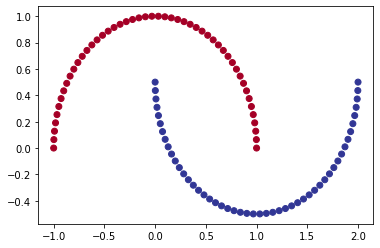

In [16]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [74]:
import tensorflow as tf
# Set random seed
tf.random.set_seed(7)

model_1 = tf.keras.Sequential([
          tf.keras.layers.Des(3),                     
          tf.keras.layers.Conv1D(3,2),
          tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)         
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])



model_1.fit(X,y,epochs=200)


Epoch 1/200


ValueError: ignored

In [50]:
predictions = model_1.predict(X_test)
np.round(predictions)
tf.metrics.binary_accuracy(y_pred=np.round(tf.squeeze(predictions)),y_true=y_test)

<tf.Tensor: shape=(), dtype=float32, numpy=0.8>

In [57]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classifcation...


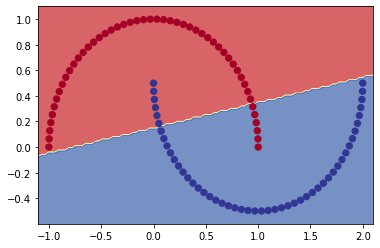

In [70]:
plot_decision_boundary(model_1,X,y)